In [306]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.metrics import confusion_matrix,classification_report
import warnings 
warnings.simplefilter(action = "ignore",category = FutureWarning)

In [307]:
email = pd.read_csv("email message.csv", encoding = "latin-1")
email.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [308]:
email.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [309]:
email.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [310]:
email.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
5567    False
5568    False
5569    False
5570    False
5571    False
Length: 5572, dtype: bool

In [311]:
# plot the show the dataset is imbalanced

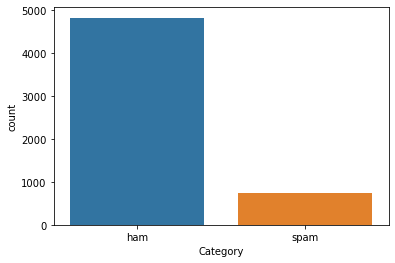

In [312]:
sns.countplot(data=email,x="Category")
plt.show()

In [313]:
#balancing the dataset by downsampling
email_spam = email[email["Category"]=="spam"]

email_ham = email[email["Category"]=="ham"]

In [314]:
#downsampling
email_ham_balanced = email_ham.sample(email_spam.shape[0])
email_bal = pd.concat([email_spam,email_ham_balanced])
print(email_bal["Category"].value_counts())

email_bal["Message"] = email_bal["Message"].str.lower()
email_bal["Message"] = email_bal["Message"].astype(str)

email_bal.sample(5)

spam    747
ham     747
Name: Category, dtype: int64


,Category,Message
5232,spam,you are chosen to receive a â£350 award! pls c...
1227,spam,reply with your name and address and you will ...
956,ham,sorry i now then c ur msg... yar lor so poor t...
4162,spam,had your mobile 11 months or more? u r entitle...
65,spam,"as a valued customer, i am pleased to advise y..."



 balanced dataset:
 spam    747
ham     747
Name: Category, dtype: int64


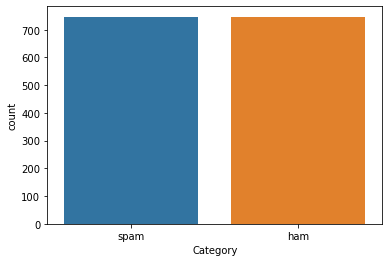

In [315]:
print("\n balanced dataset:\n",email_bal['Category'].value_counts())
sns.countplot(data=email_bal,x="Category")
plt.show()

In [316]:
#encoding spam=1 and ham=0
email_bal["Category"] = email_bal["Category"].apply(lambda x:1 if x == "spam" else 0)
email_bal.sample(10)

,Category,Message
790,0,gud mrng dear hav a nice day
4206,1,important information 4 orange user 0796xxxxxx...
3009,1,"loan for any purpose â£500 - â£75,000. homeown..."
3667,0,i'm turning off my phone. my moms telling ever...
4407,1,as one of our registered subscribers u can ent...
833,1,"dear voucher holder, to claim this weeks offer..."
1294,0,happy birthday... may all ur dreams come true...
117,1,you are a winner u have been specially selecte...
4823,1,u r a winner u ave been specially selected 2 r...
4274,0,kind of. just missed train cos of asthma attac...


In [317]:
 import re
import string
#remove punctuations
email_bal["Message"] = email_bal["Message"].str.replace('[^\w\s]','')
print('punctuation remove\n',email_bal["Message"])


punctuation remove
 2       free entry in 2 a wkly comp to win fa cup fina...
5       freemsg hey there darling its been 3 weeks now...
8       winner as a valued network customer you have b...
9       had your mobile 11 months or more u r entitled...
11      six chances to win cash from 100 to 20000 poun...
                              ...                        
2739    i sent you the prices and do you mean the  ltgt g
4274    kind of just missed train cos of asthma attack...
276                                                 thanx
2582    yup im elaborating on the safety aspects and s...
2368    v nice off 2 sheffield tom 2 air my opinions o...
Name: Message, Length: 1494, dtype: object


In [318]:
# processing the email message
 
# tokenize split words
email_bal["Message"] = email_bal.apply(lambda row: nltk.word_tokenize(row["Message"]), axis=1)
print( email_bal["Message"])



2       [free, entry, in, 2, a, wkly, comp, to, win, f...
5       [freemsg, hey, there, darling, its, been, 3, w...
8       [winner, as, a, valued, network, customer, you...
9       [had, your, mobile, 11, months, or, more, u, r...
11      [six, chances, to, win, cash, from, 100, to, 2...
                              ...                        
2739    [i, sent, you, the, prices, and, do, you, mean...
4274    [kind, of, just, missed, train, cos, of, asthm...
276                                               [thanx]
2582    [yup, im, elaborating, on, the, safety, aspect...
2368    [v, nice, off, 2, sheffield, tom, 2, air, my, ...
Name: Message, Length: 1494, dtype: object


In [319]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
# tokenize split words
#email_bal["Message"] = email_bal["Message"].str.split()
#stemming
email_bal["Message"] = email_bal["Message"].apply(lambda x: ([stemmer.stem(y) for y in x]))
print(email_bal["Message"])



2       [free, entri, in, 2, a, wkli, comp, to, win, f...
5       [freemsg, hey, there, darl, it, been, 3, week,...
8       [winner, as, a, valu, network, custom, you, ha...
9       [had, your, mobil, 11, month, or, more, u, r, ...
11      [six, chanc, to, win, cash, from, 100, to, 200...
                              ...                        
2739    [i, sent, you, the, price, and, do, you, mean,...
4274    [kind, of, just, miss, train, cos, of, asthma,...
276                                               [thanx]
2582    [yup, im, elabor, on, the, safeti, aspect, and...
2368    [v, nice, off, 2, sheffield, tom, 2, air, my, ...
Name: Message, Length: 1494, dtype: object


In [320]:
#stopword
print("stopwords")
stop_word = set(stopwords.words('english') + ['u','ur','4','2','im','dont','doin','ure','s','ü'])
email_bal["Message"] = email_bal["Message"].apply(lambda x: " ".join(word for word in x if word not in stop_word))
print(email_bal["Message"].str.split()) 



stopwords
2       [free, entri, wkli, comp, win, fa, cup, final,...
5       [freemsg, hey, darl, 3, week, word, back, id, ...
8       [winner, valu, network, custom, select, receiv...
9       [mobil, 11, month, r, entitl, updat, latest, c...
11      [six, chanc, win, cash, 100, 20000, pound, txt...
                              ...                        
2739                         [sent, price, mean, ltgt, g]
4274    [kind, miss, train, cos, asthma, attack, nxt, ...
276                                               [thanx]
2582                  [yup, elabor, safeti, aspect, issu]
2368    [v, nice, sheffield, tom, air, opinion, catego...
Name: Message, Length: 1494, dtype: object


In [321]:
import gensim
from gensim.utils import simple_preprocess
# important word in message
X = email_bal["Message"].str.split()
dictionary = gensim.corpora.Dictionary(X)

count = 0 
for k, v in dictionary.iteritems():
    print(k ,v)
    count += 1
    if count>4:
        break

0 08452810075over18
1 2005
2 21st
3 87121
4 appli


In [322]:
#numb of time word appear in message
dictionary.filter_extremes(no_below = 15, no_above = 0.5, keep_n = 100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in X]
bow_corpus[400]

[(20, 1), (42, 1), (47, 1), (52, 1), (66, 1)]

In [323]:
bow_doc_400 = bow_corpus[400]

for i in range(len(bow_doc_400)):
    print("word {}(\"{}\") appears{} time.".format(bow_doc_400[i][0],dictionary[bow_doc_400[i][0]],bow_doc_400[i][1]))


word 20("call") appears1 time.
word 42("1") appears1 time.
word 47("messag") appears1 time.
word 52("pleas") appears1 time.
word 66("new") appears1 time.


In [324]:
#tfidf convert  topics to eigen vectors
from gensim import corpora,models
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf =tfidf[bow_corpus]

from pprint import pprint

for doc in corpus_tfidf:
    pprint(doc)
    break


[(0, 0.30146660067652187),
 (1, 0.6579614360630346),
 (2, 0.3327444203199456),
 (3, 0.16720600457704524),
 (4, 0.354936386525809),
 (5, 0.2918114413717288),
 (6, 0.18487186967315444),
 (7, 0.18046263562702006),
 (8, 0.2442331125388064)]


In [325]:
#Running LDA (latent Dirichlet Allocation)using tfidf
lda_tfidf = gensim.models.LdaMulticore( corpus_tfidf, num_topics =5, id2word = dictionary, eval_every = 1,per_word_topics =True, passes =50, chunksize = 100, workers = 7)

for idx,topic in lda_tfidf.print_topics(-1):
    print("Topic: {}\nWords:{}".format (idx, topic))
    

Topic: 0
Words:0.054*"home" + 0.043*"ok" + 0.034*"come" + 0.031*"ã¼" + 0.031*"hey" + 0.031*"yeah" + 0.027*"phone" + 0.027*"3" + 0.027*"b" + 0.025*"ani"
Topic: 1
Words:0.048*"like" + 0.035*"tell" + 0.033*"get" + 0.029*"want" + 0.029*"yes" + 0.028*"say" + 0.023*"give" + 0.022*"whi" + 0.022*"said" + 0.021*"messag"
Topic: 2
Words:0.040*"send" + 0.033*"stop" + 0.029*"text" + 0.029*"free" + 0.026*"txt" + 0.023*"win" + 0.021*"mobil" + 0.020*"way" + 0.020*"oh" + 0.017*"call"
Topic: 3
Words:0.043*"call" + 0.036*"ask" + 0.035*"claim" + 0.034*"prize" + 0.022*"urgent" + 0.021*"show" + 0.021*"cash" + 0.020*"select" + 0.020*"award" + 0.019*"onli"
Topic: 4
Words:0.034*"take" + 0.034*"got" + 0.033*"ltgt" + 0.029*"ill" + 0.029*"go" + 0.029*"still" + 0.026*"sorri" + 0.024*"good" + 0.023*"need" + 0.022*"know"


In [326]:
#Running LDA (latent Dirichlet Allocation) on bag of word for prediction purposes
lda_train = gensim.models.LdaMulticore( bow_corpus, num_topics =20, id2word = dictionary, eval_every = 1,per_word_topics =True, passes =50, chunksize = 100, workers = 7)
lda_train.save('lda_train.model')
for idx,topic in lda_train.print_topics(-1):
    print("Topic: {}\nWords:{}".format (idx, topic))
    

Topic: 0
Words:0.147*"know" + 0.108*"love" + 0.084*"meet" + 0.075*"work" + 0.066*"let" + 0.061*"find" + 0.056*"alway" + 0.055*"use" + 0.038*"could" + 0.037*"first"
Topic: 1
Words:0.144*"ok" + 0.103*"call" + 0.101*"number" + 0.071*"select" + 0.065*"end" + 0.063*"receiv" + 0.062*"claim" + 0.056*"pleas" + 0.053*"award" + 0.040*"custom"
Topic: 2
Words:0.095*"sorri" + 0.076*"one" + 0.065*"think" + 0.064*"great" + 0.063*"see" + 0.057*"yes" + 0.054*"look" + 0.053*"miss" + 0.051*"make" + 0.051*"friend"
Topic: 3
Words:0.090*"call" + 0.082*"free" + 0.058*"mobil" + 0.045*"phone" + 0.040*"prize" + 0.032*"guarante" + 0.032*"claim" + 0.031*"urgent" + 0.029*"latest" + 0.028*"camera"
Topic: 4
Words:0.100*"win" + 0.077*"txt" + 0.058*"week" + 0.057*"day" + 0.046*"b" + 0.043*"entri" + 0.043*"chanc" + 0.042*"voucher" + 0.039*"everi" + 0.036*"â100"
Topic: 5
Words:0.094*"call" + 0.091*"collect" + 0.070*"way" + 0.062*"await" + 0.056*"box" + 0.054*"help" + 0.053*"holiday" + 0.051*"cash" + 0.045*"po" + 0.044*"

In [327]:
train_vecs = []
for i in range(len(X)):
    top_topics = lda_train.get_document_topics( bow_corpus[i], minimum_probability=0.0)
    topic_vec = [top_topics[i][1] for i in range(20)]
    train_vecs.append(topic_vec) 

In [328]:
#applying LDA
from sklearn.model_selection import train_test_split
# scaling the dataset using MinMaxscaler
from sklearn.preprocessing import MinMaxScaler

X = np.array(train_vecs)
y = email_bal["Category"]

x_train, x_test,y_train, y_test = train_test_split(X ,y,test_size = 0.20,random_state=20)
# Scale Data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

              precision    recall  f1-score   support

           0       0.84      0.85      0.84       145
           1       0.86      0.84      0.85       154

    accuracy                           0.85       299
   macro avg       0.85      0.85      0.85       299
weighted avg       0.85      0.85      0.85       299



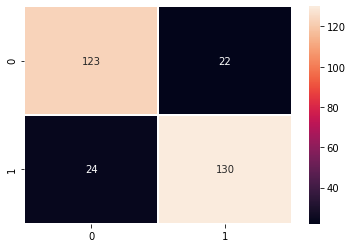

In [329]:
from sklearn import svm
#using SVC algorith
model = svm.SVC()
model.fit(x_train, y_train)
pred = model.predict(x_test)

from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(pred,y_test))

confus = confusion_matrix(pred,y_test)
sns.heatmap(confus, annot=True,linewidths=1,fmt="d")
plt.show()



              precision    recall  f1-score   support

           0       0.88      0.79      0.84       164
           1       0.78      0.87      0.82       135

    accuracy                           0.83       299
   macro avg       0.83      0.83      0.83       299
weighted avg       0.84      0.83      0.83       299



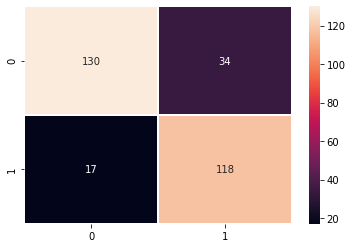

In [330]:
from sklearn.naive_bayes import MultinomialNB
bayes = MultinomialNB()
bayes.fit(x_train,y_train)
pred_bayes = bayes.predict(x_test)

print(classification_report(pred_bayes,y_test))


confus = confusion_matrix(pred_bayes,y_test)
sns.heatmap(confus, annot=True,linewidths=1,fmt="d")
plt.show()
